# Notizen zur Multhopp Analyse

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import WingExt, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np
import copy

## Definition von Tragflächen

wing: Flügel mit Bremsklappen

wing2: Flügel mit Verwindung

wing3: Flügel mit Querrudern

/home/jonathan/.anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


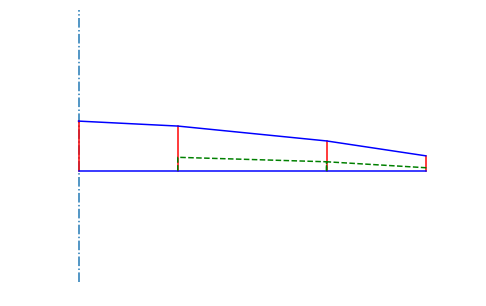

In [49]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)

wing2 = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists2, airfoils)
wing2.set_root_pos(0.7)

wing.set_flap('QR', 2, 5,[0.3,0.3])
wing.set_flap('QR2', 5, 7, [0.3,0.2])
wing.plot()
plt.savefig('Flügel zu Auftriebsverteilung.png')

## Analyse Objekte werden erstellt und Berechnungsergebnisse geplottet

/home/jonathan/Programmieren/wingstructure/wingstructure/analysis.py:16: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')
/home/jonathan/Programmieren/wingstructure/wingstructure/multhopp.py:124: RuntimeWarning: invalid value encountered in double_scalars
  k = C_A**2/(np.pi*AR*C_Wi)


AttributeError: 'LiftAnalysis' object has no attribute 'basic_distribution'

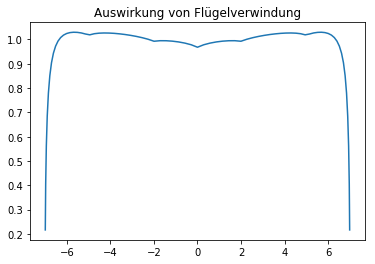

In [31]:
liftana = LiftAnalysis(wing,)
liftana2 = LiftAnalysis(wing2)

plt.title('Auswirkung von Flügelverwindung')
plt.plot(liftana.calculation_positions, liftana.base_distribution)
plt.plot(liftana2.calculation_positions, liftana2.basic_distribution)
plt.plot(liftana.calculation_positions, liftana.calculation_chord_lengths)
plt.figure()
plt.title('Luftbremsenwirkung')
plt.plot(liftana.calculation_positions, liftana.basic_distribution)
plt.plot(liftana.calculation_positions, liftana.airbrake_distribution)
plt.plot(liftana.calculation_positions, liftana.basic_distribution+liftana.airbrake_distribution)
plt.figure()
plt.title('Querruderwirkung')
# aileron_distribution entspricht 1° Ausschlag * 22.743 * np.arctan( 0.04715 * 10)==  Ausschlag 10°
plt.plot(liftana.calculation_positions, liftana.flaps_distribution['QR']*22.743 * np.arctan( 0.04715 * 10))
plt.plot(liftana.calculation_positions, liftana._calculate_aileron_distribution(wing, 2)[0]['QR'])
plt.plot(liftana.calculation_positions, liftana._calculate_aileron_distribution(wing, 10)[0]['QR'])

/home/jonathan/.anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


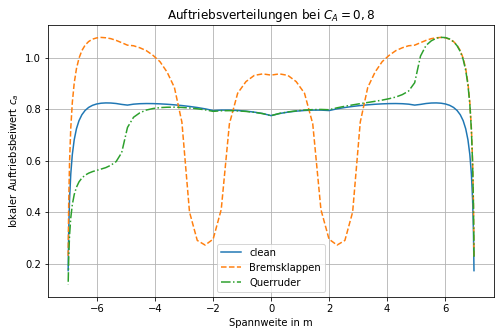

In [46]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
span_pos = liftana.calculation_positions

α, distribution = liftana.calculate(lift=0.8)
α_ab, distribution_ab = liftana.calculate(lift=0.8, airbrake=True)
α_qr, distribution_q = liftana.calculate(lift=0.8, flap_deflections={'QR2':[np.radians(5),np.radians(-5)]})

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='Bremsklappen')
plt.plot(span_pos, distribution_q, '-.', label='Querruder')
plt.xlabel('Spannweite in m')
plt.ylabel('lokaler Auftriebsbeiwert $c_a$')
plt.title('Auftriebsverteilungen bei $C_A = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Auftriebsverteilung.png')


In [32]:
liftana.basic_distribution, liftana.airbrake_lift, liftana.flaps_lift, liftana.n

AttributeError: 'LiftAnalysis' object has no attribute 'basic_distribution'

In [33]:
def calc_lift_from_dist(span_pos, lift_distri, wing_chord_lengths):
    S =  np.trapz(wing_chord_lengths, span_pos)
    return np.trapz(np.multiply(lift_distri, wing_chord_lengths), span_pos) / S

In [34]:
calc_lift_from_dist(liftana.calculation_positions, liftana.basic_distribution, liftana.calculation_chord_lengths)

AttributeError: 'LiftAnalysis' object has no attribute 'basic_distribution'

In [14]:
calc_lift_from_dist(liftana2.calculation_positions, liftana2.basic_distribution, liftana2.calculation_chord_lengths)

NameError: name 'liftana2' is not defined

In [15]:
liftmomana = LiftAndMomentAnalysis(wing)
liftmomana.calculate(1,flap_deflections = {'QR':[1,-2]})

/home/jonathan/.anaconda3/lib/python3.6/site-packages/wingstructure/analysis.py:16: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


KeyError: 'C_A'